In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


from pathlib import Path



In [2]:
idle_dir = 'D:\study\GoIT\cours\python_DS\module_5\data\idle'
running_dir = 'D:\\study\\GoIT\\cours\\python_DS\\module_5\\data\\running'
stairs_dir = 'D:\study\GoIT\cours\python_DS\module_5\data\stairs'
walking_dir = 'D:\study\GoIT\cours\python_DS\module_5\data\walking'

In [3]:
idle_df = pd.DataFrame()
running_df = pd.DataFrame()
stairs_df = pd.DataFrame()
walking_df = pd.DataFrame()

idle = 1
running = 2
stairs = 3
walking = 4

In [4]:
def collect_data(path, df, activity):
  p = Path(path)


  for el in p.iterdir():

    next_df = pd.read_csv(el)
    next_df['activity'] = activity
    
    df = pd.concat([df, next_df])

  return df #.reset_index(drop=True)

idle_df = collect_data(idle_dir, idle_df, idle)
running_df = collect_data(running_dir, running_df, running)
stairs_df = collect_data(stairs_dir, stairs_df, stairs)
walking_df = collect_data(walking_dir, walking_df, walking)


idle_df.head(), running_df.head(), stairs_df.head(), walking_df.head()


(   accelerometer_X  accelerometer_Y  accelerometer_Z  activity
 0         1.000776         4.616021         8.576031         1
 1         0.718261         4.209007         8.446744         1
 2        -0.909797        -0.282516         9.203311         1
 3         5.099650         0.148441         8.418014         1
 4         1.762132        -0.162806         9.251195         1,
    accelerometer_X  accelerometer_Y  accelerometer_Z  activity
 0        -4.151545         1.781286         2.173935         2
 1         2.020706         3.706224         9.921572         2
 2         1.762132         4.242526         8.078037         2
 3        -0.445322        11.080365         6.756438         2
 4         5.573702        13.436260        15.054740         2,
    accelerometer_X  accelerometer_Y  accelerometer_Z  activity
 0         6.727707         2.973599         3.936068         3
 1         7.891289         0.440533        -3.342306         3
 2         6.301539        -1.154005  

In [5]:
df = pd.concat([idle_df, running_df, stairs_df, walking_df]).reset_index(drop=True)
df

,accelerometer_X,accelerometer_Y,accelerometer_Z,activity
0,1.000776,4.616021,8.576031,1
1,0.718261,4.209007,8.446744,1
2,-0.909797,-0.282516,9.203311,1
3,5.099650,0.148441,8.418014,1
4,1.762132,-0.162806,9.251195,1
...,...,...,...,...
193855,5.109226,-15.452178,-1.470040,4
193856,6.373365,-11.741165,-8.226476,4
193857,3.289633,-9.993398,-0.383072,4
193858,-2.978387,-3.050213,1.273715,4


In [6]:
X = df[['accelerometer_X', 'accelerometer_Y', 'accelerometer_Z']]
y = df['activity']
X.shape, y.shape

((193860, 3), (193860,))

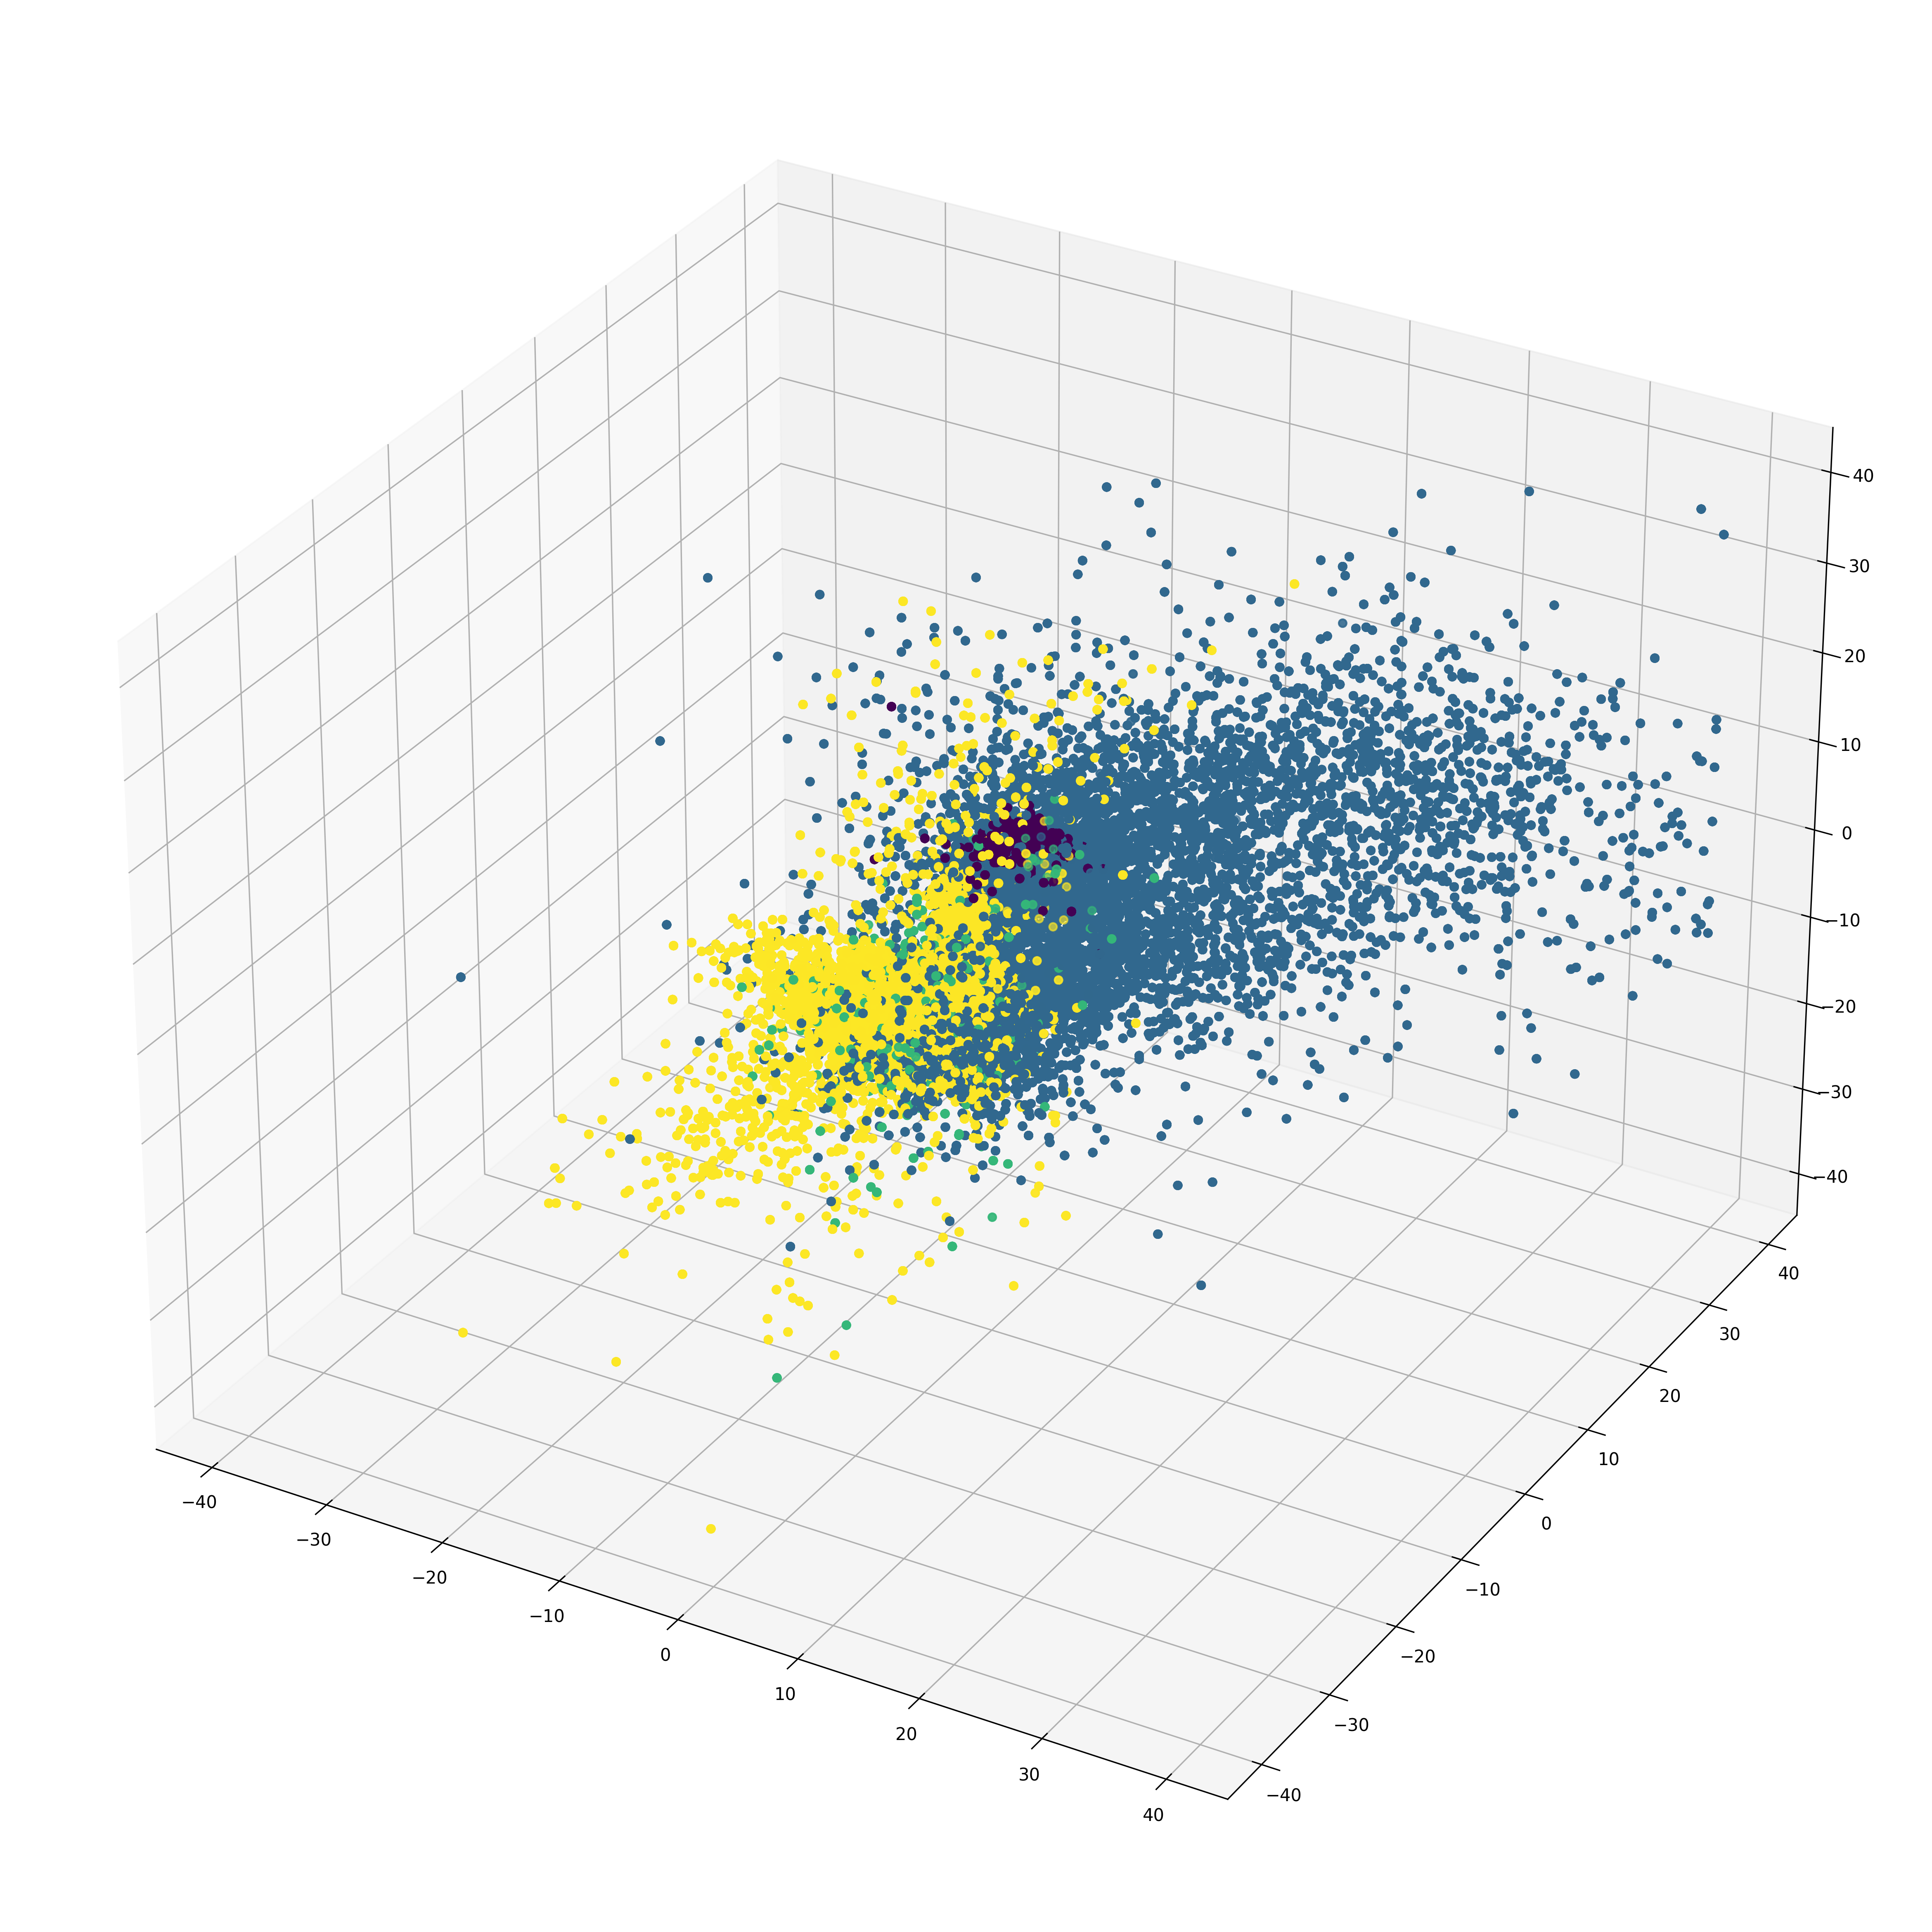

In [7]:
fig = plt.figure(figsize=(20, 20), dpi=300)
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X['accelerometer_X'], X['accelerometer_Y'], X['accelerometer_Z'], c=y) #c - color
plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=True, stratify=y)  # random_state=42
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, shuffle=True, stratify=y_test)
X_train.shape, X_valid.shape, X_test.shape, y_train.shape, y_valid.shape, y_test.shape

((116316, 3), (38772, 3), (38772, 3), (116316,), (38772,), (38772,))

In [9]:


features = {"max": np.max,
            "min": np.min,

            "idxmax": np.argmax,
            "idxmin": np.argmin,
            "mean": np.mean,
            "median": np.median,
  
            "var": np.var,
            "std": np.std,
            
        
           }


In [10]:
for key, val in features.items():
    print(f'{key=} {val(df)}')

key='max' 39.188293
key='min' -39.188293
key='idxmax' 142916
key='idxmin' 163317
key='mean' 1.941028609785412
key='median' 2.0
key='var' accelerometer_X     70.641428
accelerometer_Y    155.600897
accelerometer_Z     51.718702
activity             1.140222
dtype: float64
key='std' accelerometer_X     8.404846
accelerometer_Y    12.474009
accelerometer_Z     7.191572
activity            1.067812
dtype: float64


In [11]:
forest = RandomForestClassifier(n_estimators=3).fit(X_train, y_train)
svc_poly = SVC(kernel='rbf', C=10).fit(X_train, y_train)


In [18]:
print("RFC model feature importances=", forest.feature_importances_)

print('f1_score RFC model= ', end = ' ') 
print('train:', f1_score(y_train, forest.predict(X_train), average='micro'), end = ' ')
print('test:', f1_score(y_test, forest.predict(X_test), average='micro'), end = ' ')
print('valid:', f1_score(y_valid, forest.predict(X_valid), average='micro'))

print('f1_score SVM=', end = ' ')
print('train:', f1_score(y_train, svc_poly.predict(X_train), average='micro'), end = ' ')
print('test:', f1_score(y_test, svc_poly.predict(X_test), average='micro'), end = ' ')
print('valid:', f1_score(y_valid, svc_poly.predict(X_valid), average='micro'))


RFC model feature importances= [0.31663052 0.41700474 0.26636474]
f1_score RFC model=  train: 0.9998452491488703 test: 0.9992262457443516 valid: 0.9992520375528732
f1_score SVM= train: 0.8958526771897245 test: 0.897090683998762 valid: 0.8994635303827504


In [21]:
svm_test = svc_poly.predict(X_test)
svm_valid = svc_poly.predict(X_valid)

rf_test = forest.predict(X_test)
rf_valid = forest.predict(X_valid)

svm_test_report = classification_report(y_test, svm_test)
svm_valid_report = classification_report(y_valid, svm_valid)

rf_test_report = classification_report(y_test, rf_test)
rf_valid_report = classification_report(y_valid, rf_valid)

print(f'{svm_test_report=}')
print(f'{svm_valid_report=}')
print(f'{rf_test_report=}')
print(f'{rf_valid_report=}')

svm_test_report='              precision    recall  f1-score   support\n\n           1       0.97      0.99      0.98      6234\n           2       0.93      0.91      0.92     20448\n           3       1.00      0.01      0.01       990\n           4       0.81      0.91      0.85     11100\n\n    accuracy                           0.90     38772\n   macro avg       0.93      0.70      0.69     38772\nweighted avg       0.90      0.90      0.89     38772\n'
svm_valid_report='              precision    recall  f1-score   support\n\n           1       0.97      0.99      0.98      6234\n           2       0.94      0.91      0.92     20448\n           3       1.00      0.01      0.01       990\n           4       0.81      0.92      0.86     11100\n\n    accuracy                           0.90     38772\n   macro avg       0.93      0.70      0.69     38772\nweighted avg       0.91      0.90      0.89     38772\n'
rf_test_report='              precision    recall  f1-score   support\n\n

svm_test_report='  precision    recall  f1-score   support
                1       0.97      0.99      0.98      6234
                2       0.93      0.91      0.92     20448
                3       1.00      0.01      0.01       990
                4       0.81      0.91      0.85     11100
         accuracy                           0.90     38772
        macro avg       0.93      0.70      0.69     38772
     weighted avg       0.90      0.90      0.89     38772
     
     
svm_valid_report=' precision    recall  f1-score   support
                1       0.97      0.99      0.98      6234
                2       0.94      0.91      0.92     20448
                3       1.00      0.01      0.01       990
                4       0.81      0.92      0.86     11100
         accuracy                           0.90     38772
        macro avg       0.93      0.70      0.69     38772
     weighted avg       0.91      0.90      0.89     38772
     '
     
rf_test_report='  precision    recall  f1-score   support
               1       1.00      1.00      1.00      6234
               2       1.00      1.00      1.00     20448
               3       1.00      0.98      0.99       990
               4       1.00      1.00      1.00     11100
        accuracy                           1.00     38772
       macro avg       1.00      1.00      1.00     38772
    weighted avg       1.00      1.00      1.00     38772
    '
    
rf_valid_report='  precision    recall  f1-score   support
                1       1.00      1.00      1.00      6234
                2       1.00      1.00      1.00     20448
                3       1.00      0.98      0.99       990
                4       1.00      1.00      1.00     11100
         accuracy                           1.00     38772
        macro avg       1.00      0.99      1.00     38772
     weighted avg       1.00      1.00      1.00     38772
     '

Висновки:
В цілому дерева показили себе більш ефективними. SVM показав поганий результат для визначення руху по сходинкам. Можливо при різних параметрах kernel, С, degree можна було навчити модель краще, але час навчання більше години, помноживши на кількість комбінацій - це день+
При цьому дерева показали гарний результат і при тесті і при валідації по всім активностям, плюс начання та перевірка моделі була в сотні раз швидша